TEAM: ML MAVERICS

Homework Week 2 Final: Fractal Clustering V2


[EXTRA CREDIT]

- 2.3 Replace Euclidean distance (in k-means) with Fractal Distance (10 points!!!!!) and

- 2.4 Analyze data distribution for best algorithm to use (5 points)

- 2.5 run Fractal Clustering (15 points) using a suitable algorithm (not just k-means, GMM...)

# Step 1: Data Loading and Initial Exploration
In this step, we will:
- Import necessary libraries
- Load the dataset
- Display basic information about the dataset
- Check for missing values and data types

# Step 1: Initial Data Preparation
We'll first prepare our data for fractal clustering by:
- Selecting relevant features
- Scaling the data
- Initial data visualization

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('dailyActivity_merged.csv')

# Select features for clustering
features = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes',
           'FairlyActiveMinutes', 'LightlyActiveMinutes',
           'SedentaryMinutes', 'Calories']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Create DataFrame with scaled features
X_scaled = pd.DataFrame(X, columns=features)

print("Shape of scaled data:", X_scaled.shape)
print("\nFirst few rows of scaled data:")
print(X_scaled.head())

Shape of scaled data: (457, 7)

First few rows of scaled data:
   TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0    0.826587       0.599979           0.566891            -0.029584   
1    2.051417       1.688854           2.505409             0.108656   
2    1.147769       0.948223           1.363068            -0.223120   
3    1.239561       1.046320           0.774589             0.191600   
4    1.018888       0.781458           0.393809             0.412784   

   LightlyActiveMinutes  SedentaryMinutes  Calories  
0              0.286143         -0.568189 -0.454771  
1              0.851385         -1.209800 -0.043522  
2              0.802234         -1.159303 -0.301320  
3              0.441790          0.251647 -0.316051  
4              0.597436         -0.689976 -0.372521  


# Step 1.A: Initial Clustering Analysis
We'll perform the first level of clustering to:
- Determine optimal k using elbow method
- Visualize cluster distributions
- Store initial cluster assignments

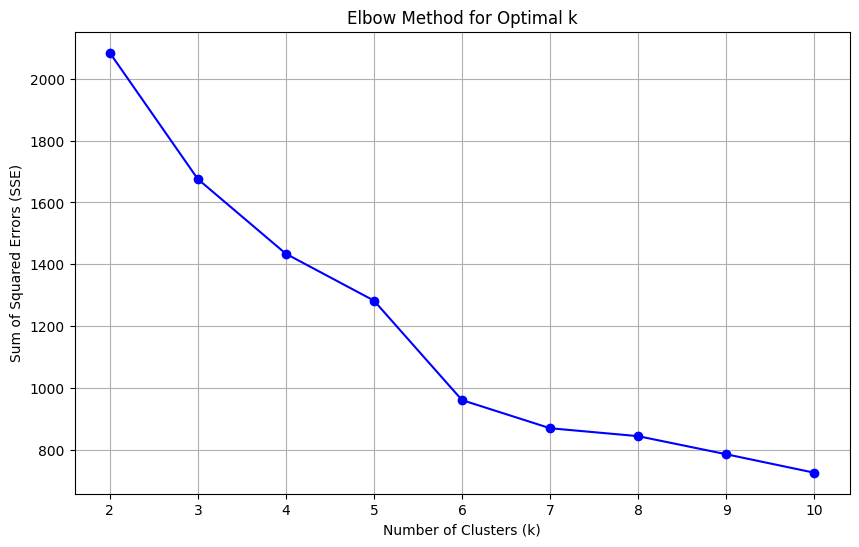

SSE values for each k:
k=2: 2084.25
k=3: 1675.69
k=4: 1434.13
k=5: 1282.61
k=6: 960.94
k=7: 869.95
k=8: 844.34
k=9: 785.85
k=10: 726.11


In [ ]:
# Function to plot elbow curve
def plot_elbow_curve(X, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    return sse

# Plot elbow curve for initial clustering
k_range = range(2, 11)
sse_values = plot_elbow_curve(X_scaled, k_range)

print("SSE values for each k:")
for k, sse in zip(k_range, sse_values):
    print(f"k={k}: {sse:.2f}")

# Step 1.B: First Level Fractal Clustering
Based on the elbow curve, we'll:
- Apply initial k-means clustering
- Analyze cluster characteristics
- Prepare for sub-clustering

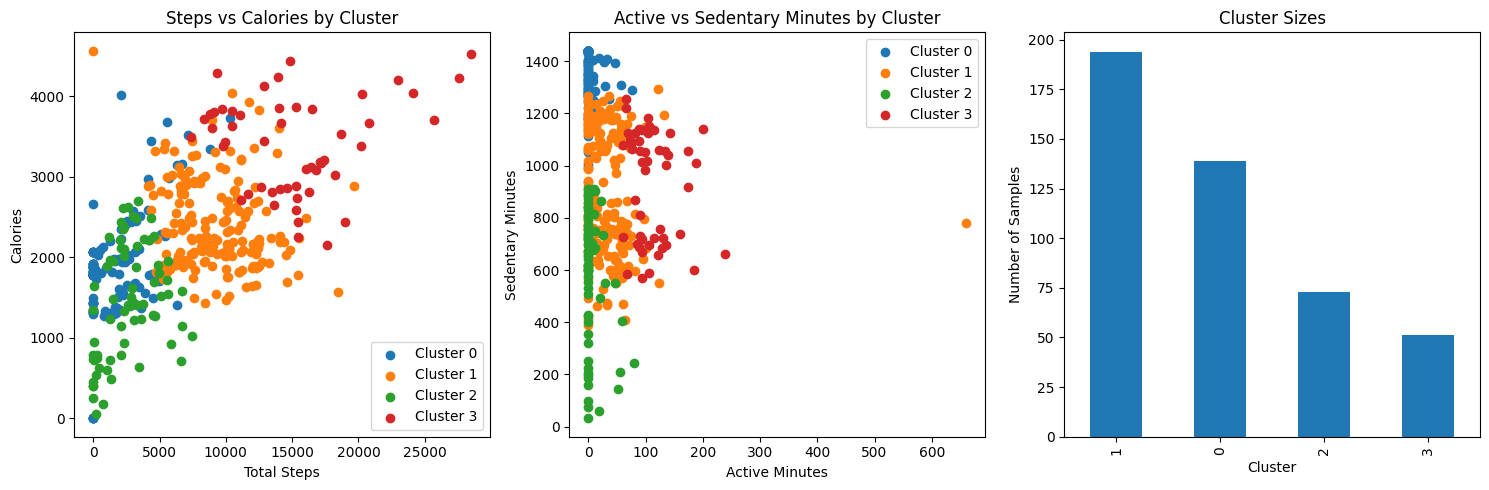


Cluster Statistics:

Cluster 0 Statistics:
       TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
count      139.00         139.00             139.00               139.00   
mean      1733.12           1.21               1.32                 1.52   
std       2136.68           1.51               6.06                 6.05   
min          0.00           0.00               0.00                 0.00   
25%          0.00           0.00               0.00                 0.00   
50%        949.00           0.65               0.00                 0.00   
75%       2830.00           2.04               0.00                 0.00   
max      10330.00           7.41              46.00                45.00   

       LightlyActiveMinutes  SedentaryMinutes  Calories  
count                139.00            139.00    139.00  
mean                  54.09           1367.47   1860.55  
std                   69.11            102.15    639.06  
min                    0.00            

In [ ]:
# Perform initial clustering with optimal k (let's say k=4 from elbow curve)
initial_k = 4
initial_kmeans = KMeans(n_clusters=initial_k, random_state=42)
initial_clusters = initial_kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Level1_Cluster'] = initial_clusters

# Visualize cluster distributions
plt.figure(figsize=(15, 5))

# Plot 1: Steps vs Calories by cluster
plt.subplot(1, 3, 1)
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    plt.scatter(cluster_data['TotalSteps'],
                cluster_data['Calories'],
                label=f'Cluster {i}')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Steps vs Calories by Cluster')
plt.legend()

# Plot 2: Active vs Sedentary Minutes
plt.subplot(1, 3, 2)
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    plt.scatter(cluster_data['VeryActiveMinutes'] +
                cluster_data['FairlyActiveMinutes'],
                cluster_data['SedentaryMinutes'],
                label=f'Cluster {i}')
plt.xlabel('Active Minutes')
plt.ylabel('Sedentary Minutes')
plt.title('Active vs Sedentary Minutes by Cluster')
plt.legend()

# Plot 3: Cluster sizes
plt.subplot(1, 3, 3)
df['Level1_Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')

plt.tight_layout()
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]
    print(f"\nCluster {i} Statistics:")
    print(cluster_data[features].describe().round(2))

# Step 1.C: Implementing Fractal Sub-clustering
In this step, we will:
- Implement recursive sub-clustering for each initial cluster
- Track cluster quality metrics
- Visualize sub-cluster formations

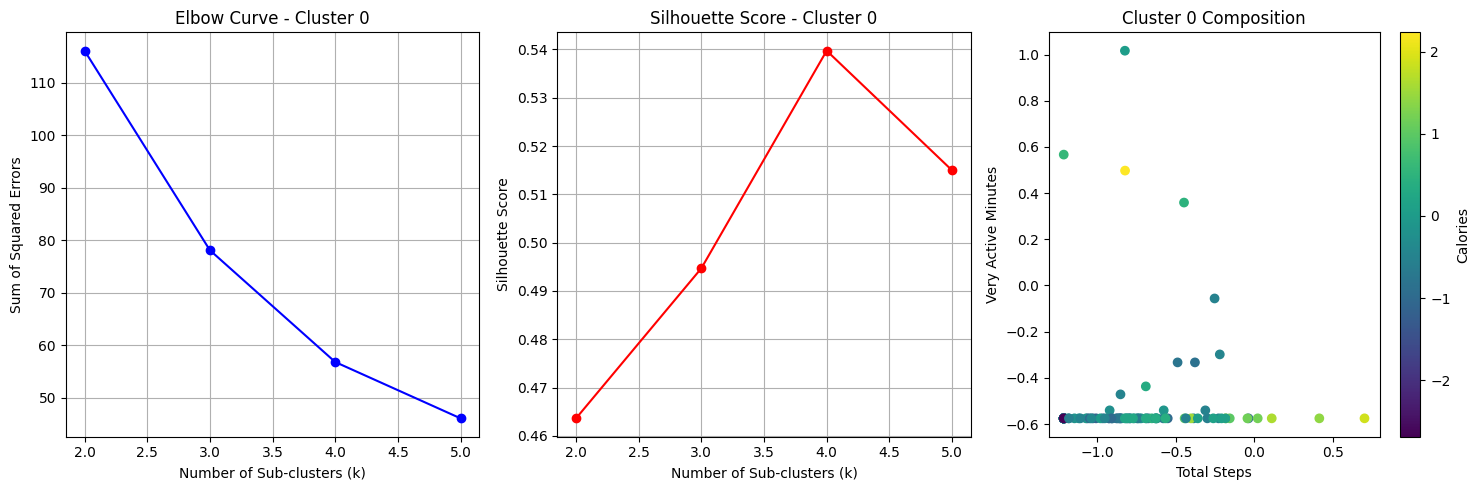


Cluster 0 Metrics:
Number of samples: 139

SSE values:
k=2: 116.12
k=3: 78.12
k=4: 56.83
k=5: 46.10

Silhouette scores:
k=2: 0.464
k=3: 0.495
k=4: 0.540
k=5: 0.515


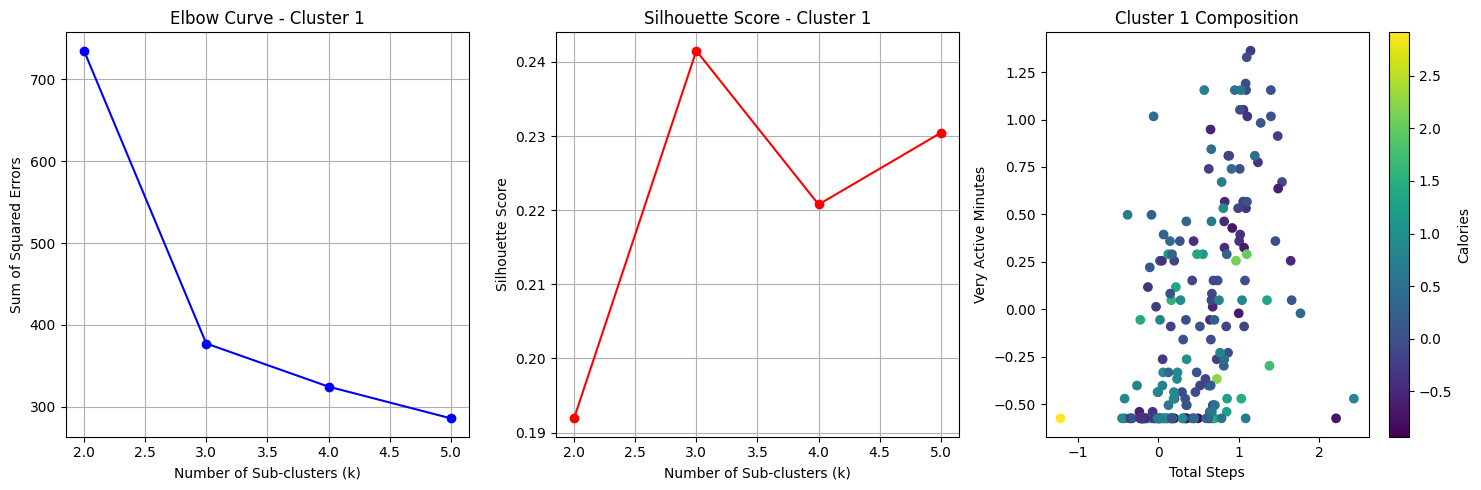


Cluster 1 Metrics:
Number of samples: 194

SSE values:
k=2: 734.70
k=3: 377.33
k=4: 324.67
k=5: 286.00

Silhouette scores:
k=2: 0.192
k=3: 0.242
k=4: 0.221
k=5: 0.230


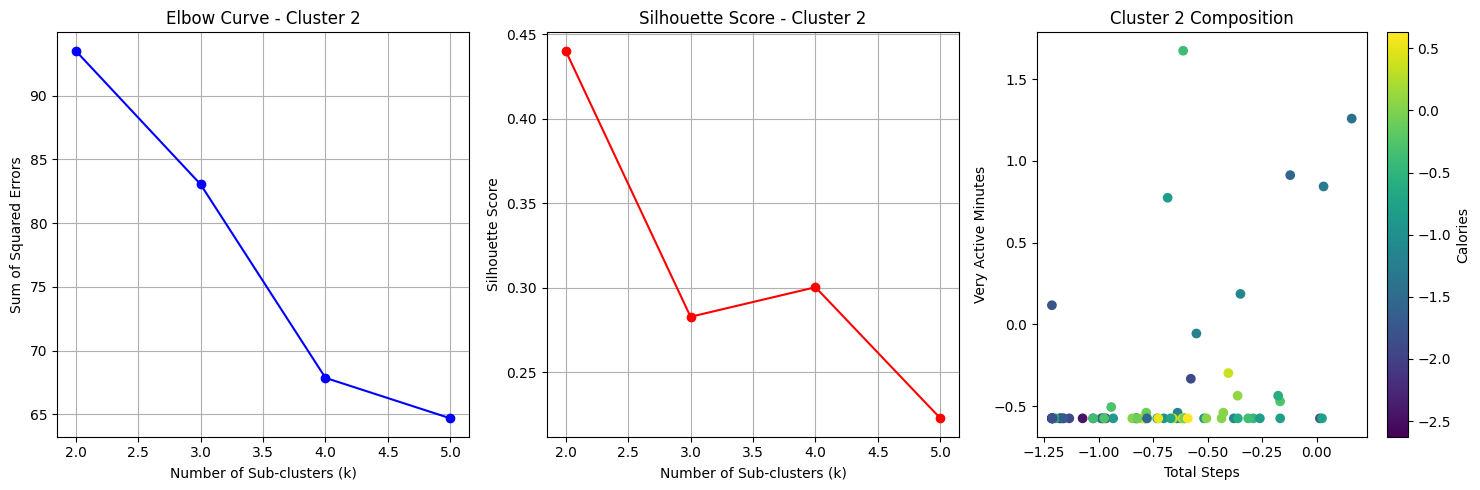


Cluster 2 Metrics:
Number of samples: 73

SSE values:
k=2: 93.51
k=3: 83.04
k=4: 67.86
k=5: 64.68

Silhouette scores:
k=2: 0.440
k=3: 0.283
k=4: 0.300
k=5: 0.223


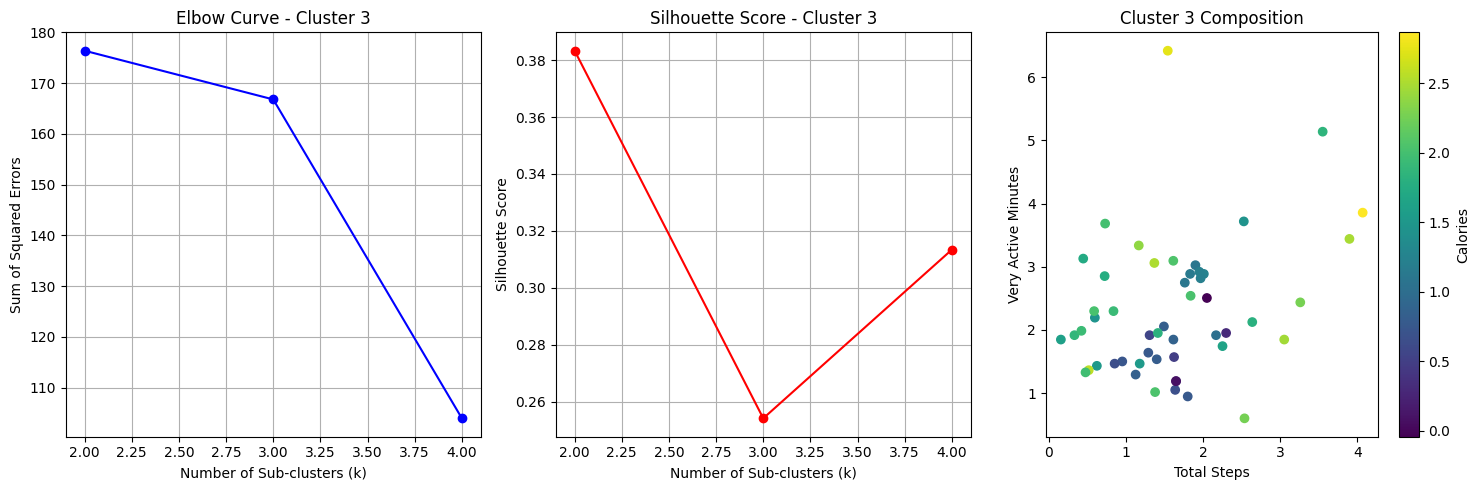


Cluster 3 Metrics:
Number of samples: 51

SSE values:
k=2: 176.40
k=3: 166.80
k=4: 103.97

Silhouette scores:
k=2: 0.383
k=3: 0.254
k=4: 0.313


In [ ]:
def perform_sub_clustering(data, features, min_samples=30):
    """
    Perform sub-clustering on given data
    Returns: optimal k and quality metrics
    """
    if len(data) < min_samples:
        return None, None, None

    # Try different k values for sub-clustering
    k_range = list(range(2, min(6, len(data)//10)))  # Convert to list for easier handling
    sse = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data[features])
        sse.append(kmeans.inertia_)
        # Calculate silhouette score for k >= 2
        silhouette_scores.append(silhouette_score(data[features], labels))

    return k_range, sse, silhouette_scores

# Visualize clustering metrics for each initial cluster
for i in range(initial_k):
    cluster_data = X_scaled[df['Level1_Cluster'] == i]

    k_range, sse, silhouette_scores = perform_sub_clustering(cluster_data, features)

    if k_range is not None and len(k_range) > 0:
        plt.figure(figsize=(15, 5))

        # Plot 1: SSE (Elbow Curve)
        plt.subplot(1, 3, 1)
        plt.plot(k_range, sse, 'bo-')
        plt.xlabel('Number of Sub-clusters (k)')
        plt.ylabel('Sum of Squared Errors')
        plt.title(f'Elbow Curve - Cluster {i}')
        plt.grid(True)

        # Plot 2: Silhouette Scores
        plt.subplot(1, 3, 2)
        plt.plot(k_range, silhouette_scores, 'ro-')
        plt.xlabel('Number of Sub-clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title(f'Silhouette Score - Cluster {i}')
        plt.grid(True)

        # Plot 3: Cluster Composition
        plt.subplot(1, 3, 3)
        scatter = plt.scatter(
            cluster_data['TotalSteps'],
            cluster_data['VeryActiveMinutes'],
            c=cluster_data['Calories'],
            cmap='viridis'
        )
        plt.colorbar(scatter, label='Calories')
        plt.xlabel('Total Steps')
        plt.ylabel('Very Active Minutes')
        plt.title(f'Cluster {i} Composition')

        plt.tight_layout()
        plt.show()

        # Print metrics
        print(f"\nCluster {i} Metrics:")
        print(f"Number of samples: {len(cluster_data)}")
        print("\nSSE values:")
        for k, ss in zip(k_range, sse):
            print(f"k={k}: {ss:.2f}")
        print("\nSilhouette scores:")
        for k, score in zip(k_range, silhouette_scores):
            print(f"k={k}: {score:.3f}")

# Step 1.D: Optimal Sub-cluster Selection
Let's analyze the results to determine:
- Which clusters should be further sub-divided
- Optimal number of sub-clusters for each cluster

In [ ]:
def find_optimal_k(sse, silhouette_scores, k_range):
    """
    Determine optimal k using both SSE and silhouette scores
    """
    # Calculate SSE percentage drops
    sse_drops = [((sse[i] - sse[i+1])/sse[i])*100 for i in range(len(sse)-1)]

    # Find optimal k using elbow method (significant drop in SSE)
    optimal_k_sse = k_range[next((i for i, drop in enumerate(sse_drops)
                                 if drop < 20), 0)]

    # Find optimal k using silhouette score (highest score)
    optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]

    # Combine both metrics (prefer silhouette if scores are good)
    if max(silhouette_scores) > 0.5:
        return optimal_k_silhouette
    else:
        return optimal_k_sse

# Analyze optimal sub-clustering for each initial cluster
for i in range(initial_k):
    cluster_data = X_scaled[df['Level1_Cluster'] == i]
    k_range, sse, silhouette_scores = perform_sub_clustering(cluster_data, features)

    if k_range is not None and len(k_range) > 0:
        optimal_k = find_optimal_k(sse, silhouette_scores, k_range)

        print(f"\nCluster {i} Analysis:")
        print(f"Number of samples: {len(cluster_data)}")
        print(f"Optimal number of sub-clusters: {optimal_k}")
        print(f"Best silhouette score: {max(silhouette_scores):.3f}")
        print(f"SSE reduction at optimal k: {((sse[0] - sse[k_range.index(optimal_k)])/sse[0]*100):.2f}%")


Cluster 0 Analysis:
Number of samples: 139
Optimal number of sub-clusters: 4
Best silhouette score: 0.540
SSE reduction at optimal k: 51.06%

Cluster 1 Analysis:
Number of samples: 194
Optimal number of sub-clusters: 3
Best silhouette score: 0.242
SSE reduction at optimal k: 48.64%

Cluster 2 Analysis:
Number of samples: 73
Optimal number of sub-clusters: 2
Best silhouette score: 0.440
SSE reduction at optimal k: 0.00%

Cluster 3 Analysis:
Number of samples: 51
Optimal number of sub-clusters: 2
Best silhouette score: 0.383
SSE reduction at optimal k: 0.00%


# Step 1.1: Implementing Objective Functions

Defining objective functions that focus on:
1. Activity Pattern Effectiveness
2. User Engagement and Progress

In [ ]:
def objective_function_1(cluster_data):
    """
    Activity Balance and Adherence Score
    Purpose: Evaluate how well activities are balanced and maintained

    Components:
    1. Activity Distribution (balanced across intensity levels)
    2. Consistency in Activity (regular patterns)
    3. Goal Achievement (meeting recommended activity levels)
    """
    # 1. Activity Balance Score
    activity_mins = np.array([
        cluster_data['VeryActiveMinutes'].mean(),
        cluster_data['FairlyActiveMinutes'].mean(),
        cluster_data['LightlyActiveMinutes'].mean()
    ])

    # Calculate activity distribution
    total_active_mins = activity_mins.sum()
    activity_ratios = activity_mins / (total_active_mins + 1e-6)

    # Ideal distribution (WHO recommendations: 20% very active, 30% fairly active, 50% light active)
    ideal_ratios = np.array([0.20, 0.30, 0.50])
    balance_score = 1 - np.mean(np.abs(activity_ratios - ideal_ratios))

    # 2. Consistency Score
    steps_std = cluster_data['TotalSteps'].std()
    consistency_score = 1 / (1 + np.log1p(steps_std))

    # 3. Goal Achievement Score
    # WHO recommends 150 minutes of moderate activity or 75 minutes of vigorous activity per week
    # Converting to daily targets
    daily_target_very = 75/7  # ~11 minutes per day
    daily_target_fairly = 150/7  # ~21 minutes per day

    goal_achievement = min(1, (
        cluster_data['VeryActiveMinutes'].mean() / daily_target_very +
        cluster_data['FairlyActiveMinutes'].mean() / daily_target_fairly
    ) / 2)

    # Combine scores with weights
    final_score = (0.4 * balance_score +
                  0.3 * consistency_score +
                  0.3 * goal_achievement)

    return final_score

def objective_function_2(cluster_data):
    """
    Progress and Intensity Optimization Score
    Purpose: Evaluate effectiveness of activity patterns in terms of:
    1. Calorie Efficiency
    2. Activity Intensity Progress
    3. Active Time Utilization
    """
    # 1. Calorie Efficiency Score
    calories_per_step = cluster_data['Calories'] / (cluster_data['TotalSteps'] + 1)
    efficiency_score = 1 - (calories_per_step / calories_per_step.max()).mean()

    # 2. Intensity Progress Score
    very_active_ratio = (
        cluster_data['VeryActiveDistance'] /
        (cluster_data['TotalDistance'] + 1e-6)
    ).mean()

    # 3. Active Time Utilization
    total_minutes = (
        cluster_data['VeryActiveMinutes'] +
        cluster_data['FairlyActiveMinutes'] +
        cluster_data['LightlyActiveMinutes'] +
        cluster_data['SedentaryMinutes']
    )

    active_ratio = (
        (cluster_data['VeryActiveMinutes'] +
         cluster_data['FairlyActiveMinutes'] +
         cluster_data['LightlyActiveMinutes']) /
        total_minutes
    ).mean()

    # Combine scores with weights
    final_score = (0.35 * efficiency_score +
                  0.35 * very_active_ratio +
                  0.30 * active_ratio)

    return final_score

# Function to determine if further clustering is needed
def evaluate_cluster_quality(cluster_data, threshold=0.7):
    """
    Determine if a cluster should be further subdivided based on:
    1. Objective function scores
    2. Cluster size
    3. Internal consistency
    """
    # Calculate both objective scores
    score1 = objective_function_1(cluster_data)
    score2 = objective_function_2(cluster_data)

    # Calculate combined score
    combined_score = (score1 + score2) / 2

    # Check cluster size
    size_adequate = len(cluster_data) >= 30  # Minimum size threshold

    # Calculate internal consistency
    consistency = 1 - (cluster_data['TotalSteps'].std() / cluster_data['TotalSteps'].mean())

    # Decision criteria
    should_continue = (
        combined_score < threshold and
        size_adequate and
        consistency < 0.8
    )

    return should_continue, {
        'combined_score': combined_score,
        'size': len(cluster_data),
        'consistency': consistency
    }

# Step 1.2: Computing SSE and Silhouette Scores
In this step, we will:
- Calculate SSE and Silhouette scores for each cluster
- Analyze cluster validation metrics
- Visualize cluster quality metrics

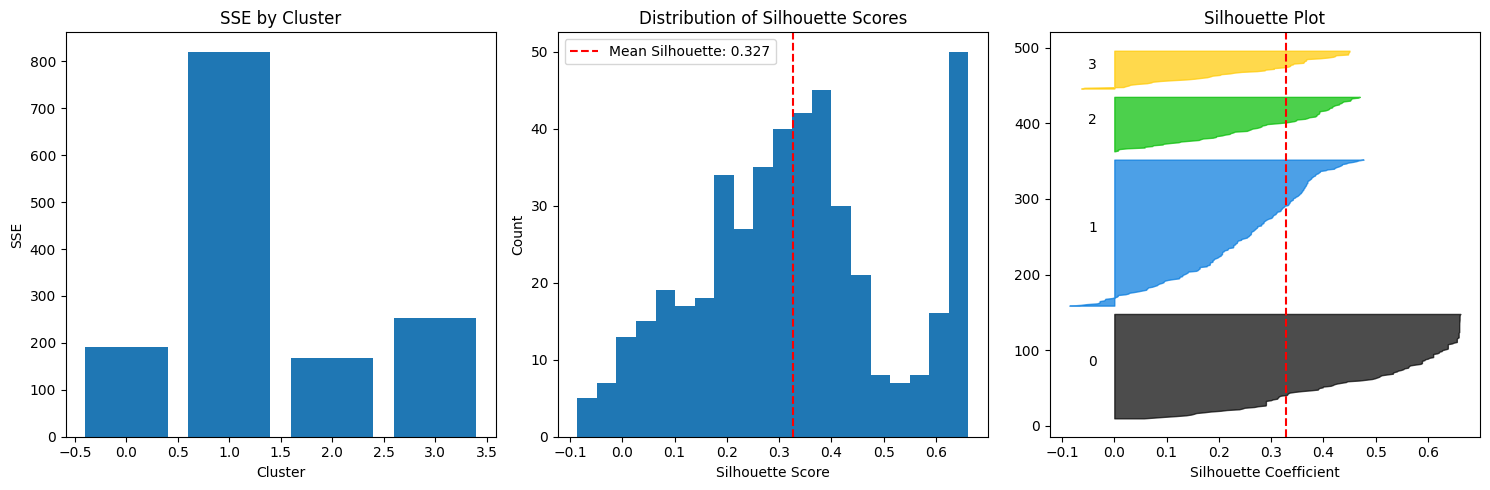


Clustering Quality Metrics:
--------------------------------------------------
Total SSE: 1434.13
Overall Silhouette Score: 0.327

Cluster-wise Analysis:

Cluster 0:
Size: 139 samples
SSE: 192.29
Mean Silhouette Score: 0.498

Cluster 1:
Size: 194 samples
SSE: 820.96
Mean Silhouette Score: 0.242

Cluster 2:
Size: 73 samples
SSE: 168.42
Mean Silhouette Score: 0.282

Cluster 3:
Size: 51 samples
SSE: 252.45
Mean Silhouette Score: 0.254


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

def compute_cluster_metrics(data, labels, level_name=""):
    """
    Compute SSE and Silhouette scores for a clustering level
    """
    # Calculate SSE
    sse_per_cluster = []
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        # Calculate SSE for each point in the cluster
        cluster_sse = np.sum(np.sum((cluster_points - centroid) ** 2, axis=1))
        sse_per_cluster.append(cluster_sse)

    # Calculate Silhouette score
    sil_score = silhouette_score(data, labels)
    sil_samples = silhouette_samples(data, labels)

    return {
        'sse_per_cluster': np.array(sse_per_cluster),
        'total_sse': sum(sse_per_cluster),
        'silhouette_score': sil_score,
        'silhouette_samples': sil_samples,
        'level': level_name
    }

# Compute metrics for initial clustering
initial_metrics = compute_cluster_metrics(X_scaled, df['Level1_Cluster'], "Level 1")

# Visualize metrics
plt.figure(figsize=(15, 5))

# Plot 1: SSE by Cluster
plt.subplot(1, 3, 1)
plt.bar(range(initial_k), initial_metrics['sse_per_cluster'])
plt.title('SSE by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SSE')

# Plot 2: Silhouette Scores Distribution
plt.subplot(1, 3, 2)
plt.hist(initial_metrics['silhouette_samples'], bins=20)
plt.axvline(initial_metrics['silhouette_score'], color='r', linestyle='--',
            label=f'Mean Silhouette: {initial_metrics["silhouette_score"]:.3f}')
plt.title('Distribution of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Count')
plt.legend()

# Plot 3: Silhouette Plot
plt.subplot(1, 3, 3)
y_lower = 10
for i in range(initial_k):
    cluster_silhouette_values = initial_metrics['silhouette_samples'][df['Level1_Cluster'] == i]
    cluster_silhouette_values.sort()

    size_cluster_i = len(cluster_silhouette_values)
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / initial_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=initial_metrics['silhouette_score'], color="red", linestyle="--")
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nClustering Quality Metrics:")
print("-" * 50)
print(f"Total SSE: {initial_metrics['total_sse']:.2f}")
print(f"Overall Silhouette Score: {initial_metrics['silhouette_score']:.3f}")

# Analyze individual clusters
print("\nCluster-wise Analysis:")
for i in range(initial_k):
    cluster_data = X_scaled[df['Level1_Cluster'] == i]
    cluster_silhouette = initial_metrics['silhouette_samples'][df['Level1_Cluster'] == i]

    print(f"\nCluster {i}:")
    print(f"Size: {len(cluster_data)} samples")
    print(f"SSE: {initial_metrics['sse_per_cluster'][i]:.2f}")
    print(f"Mean Silhouette Score: {cluster_silhouette.mean():.3f}")

# Step 2: Golden Cluster Analysis and Dataset Enhancement
In this step, we will:
1. Analyze the characteristics of our golden cluster
2. Add classification labels based on clustering results
3. Perform detailed EDAV on the golden cluster

Golden Cluster identified as Cluster 3
Number of records in Golden Cluster: 51


<ipython-input-9-d7d12d9201e2>:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


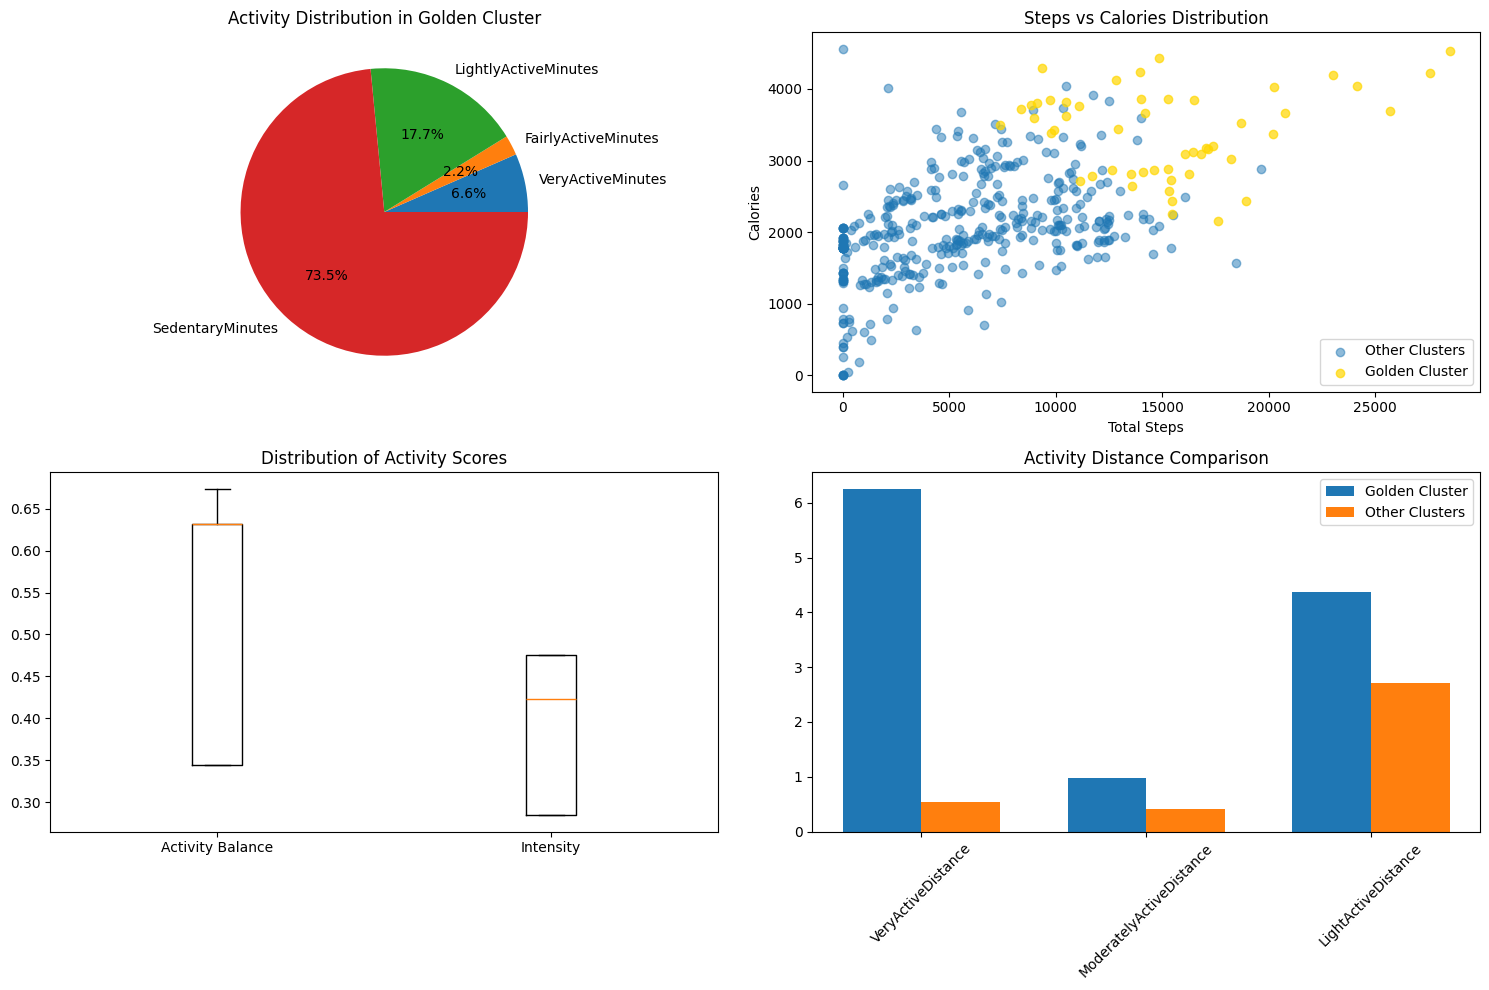


Golden Cluster Statistics:
                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  5.100000e+01     51.000000      51.000000        51.000000   
mean   6.514026e+09  15234.431373      11.622157        11.529608   
std    2.412248e+09   4874.768697       4.554059         4.589126   
min    1.503960e+09   7401.000000       5.560000         5.560000   
25%    5.577150e+09  11426.000000       8.245000         8.245000   
50%    7.007744e+09  15260.000000      10.820000        10.220000   
75%    8.378563e+09  17281.000000      13.000000        13.000000   
max    8.877689e+09  28497.000000      27.530001        27.530001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                 51.000000           51.000000                 51.000000   
mean                   0.639581            6.244706                  0.979608   
std                    1.444582            4.327994                  0.985978   
min                    0.0

In [ ]:
# First, let's identify the golden cluster based on our objective functions and validation metrics
golden_metrics = {}

for i in range(initial_k):
    cluster_data = df[df['Level1_Cluster'] == i]

    # Calculate scores
    obj_score1 = objective_function_1(cluster_data)
    obj_score2 = objective_function_2(cluster_data)
    silhouette_avg = initial_metrics['silhouette_samples'][df['Level1_Cluster'] == i].mean()

    # Normalized SSE (lower is better)
    normalized_sse = 1 - (initial_metrics['sse_per_cluster'][i] / initial_metrics['sse_per_cluster'].max())

    # Composite score
    composite_score = (
        0.3 * obj_score1 +
        0.3 * obj_score2 +
        0.2 * silhouette_avg +
        0.2 * normalized_sse
    )

    golden_metrics[i] = {
        'composite_score': composite_score,
        'obj_score1': obj_score1,
        'obj_score2': obj_score2,
        'silhouette': silhouette_avg,
        'normalized_sse': normalized_sse,
        'size': len(cluster_data)
    }

# Identify golden cluster
golden_cluster = max(golden_metrics.items(), key=lambda x: x[1]['composite_score'])[0]
golden_data = df[df['Level1_Cluster'] == golden_cluster]

# Add classification labels
df['cluster_label'] = df['Level1_Cluster']
df['is_golden'] = (df['Level1_Cluster'] == golden_cluster).astype(int)

# Create activity score columns
df['activity_balance_score'] = df.apply(lambda x: objective_function_1(df[df['Level1_Cluster'] == x['Level1_Cluster']]), axis=1)
df['intensity_score'] = df.apply(lambda x: objective_function_2(df[df['Level1_Cluster'] == x['Level1_Cluster']]), axis=1)

print(f"Golden Cluster identified as Cluster {golden_cluster}")
print(f"Number of records in Golden Cluster: {len(golden_data)}")

# Visualize golden cluster characteristics
plt.figure(figsize=(15, 10))

# Plot 1: Activity Distribution
plt.subplot(2, 2, 1)
activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
golden_activities = golden_data[activity_cols].mean()
plt.pie(golden_activities, labels=activity_cols, autopct='%1.1f%%')
plt.title('Activity Distribution in Golden Cluster')

# Plot 2: Steps vs Calories
plt.subplot(2, 2, 2)
plt.scatter(df[df['Level1_Cluster'] != golden_cluster]['TotalSteps'],
           df[df['Level1_Cluster'] != golden_cluster]['Calories'],
           alpha=0.5, label='Other Clusters')
plt.scatter(golden_data['TotalSteps'], golden_data['Calories'],
           alpha=0.7, c='gold', label='Golden Cluster')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Steps vs Calories Distribution')
plt.legend()

# Plot 3: Activity Scores Distribution
plt.subplot(2, 2, 3)
plt.boxplot([
    df['activity_balance_score'],
    df['intensity_score']
], labels=['Activity Balance', 'Intensity'])
plt.title('Distribution of Activity Scores')

# Plot 4: Key Metrics Comparison
plt.subplot(2, 2, 4)
metrics = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
golden_avg = golden_data[metrics].mean()
other_avg = df[df['Level1_Cluster'] != golden_cluster][metrics].mean()

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, golden_avg, width, label='Golden Cluster')
plt.bar(x + width/2, other_avg, width, label='Other Clusters')
plt.xticks(x, metrics, rotation=45)
plt.title('Activity Distance Comparison')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed statistics of golden cluster
print("\nGolden Cluster Statistics:")
print(golden_data.describe())

# Save enhanced dataset
df.to_csv('enhanced_activity_data.csv', index=False)

# Project Write-up: Fitness Activity Pattern Analysis
# 2.1 Data Narrative and Project Analysis

## Complete Data Narrative

1. Main Research Questions:
   - How do highly active users (golden cluster) achieve optimal fitness results?
   - What activity patterns lead to better calorie burn efficiency?
   - What are the key differences between optimal and typical fitness behaviors?

2. Business Tasks:
   - Develop personalized activity recommendations based on golden cluster patterns
   - Identify optimal activity combinations for effective calorie burn
   - Create targeted intervention points for users to improve their fitness patterns

3. ML Tasks:
   - Classification: Predict whether a user's daily activity pattern matches the golden cluster
   - Clustering: Group similar activity patterns (completed)
   - Feature Importance: Identify key metrics that contribute to optimal patterns

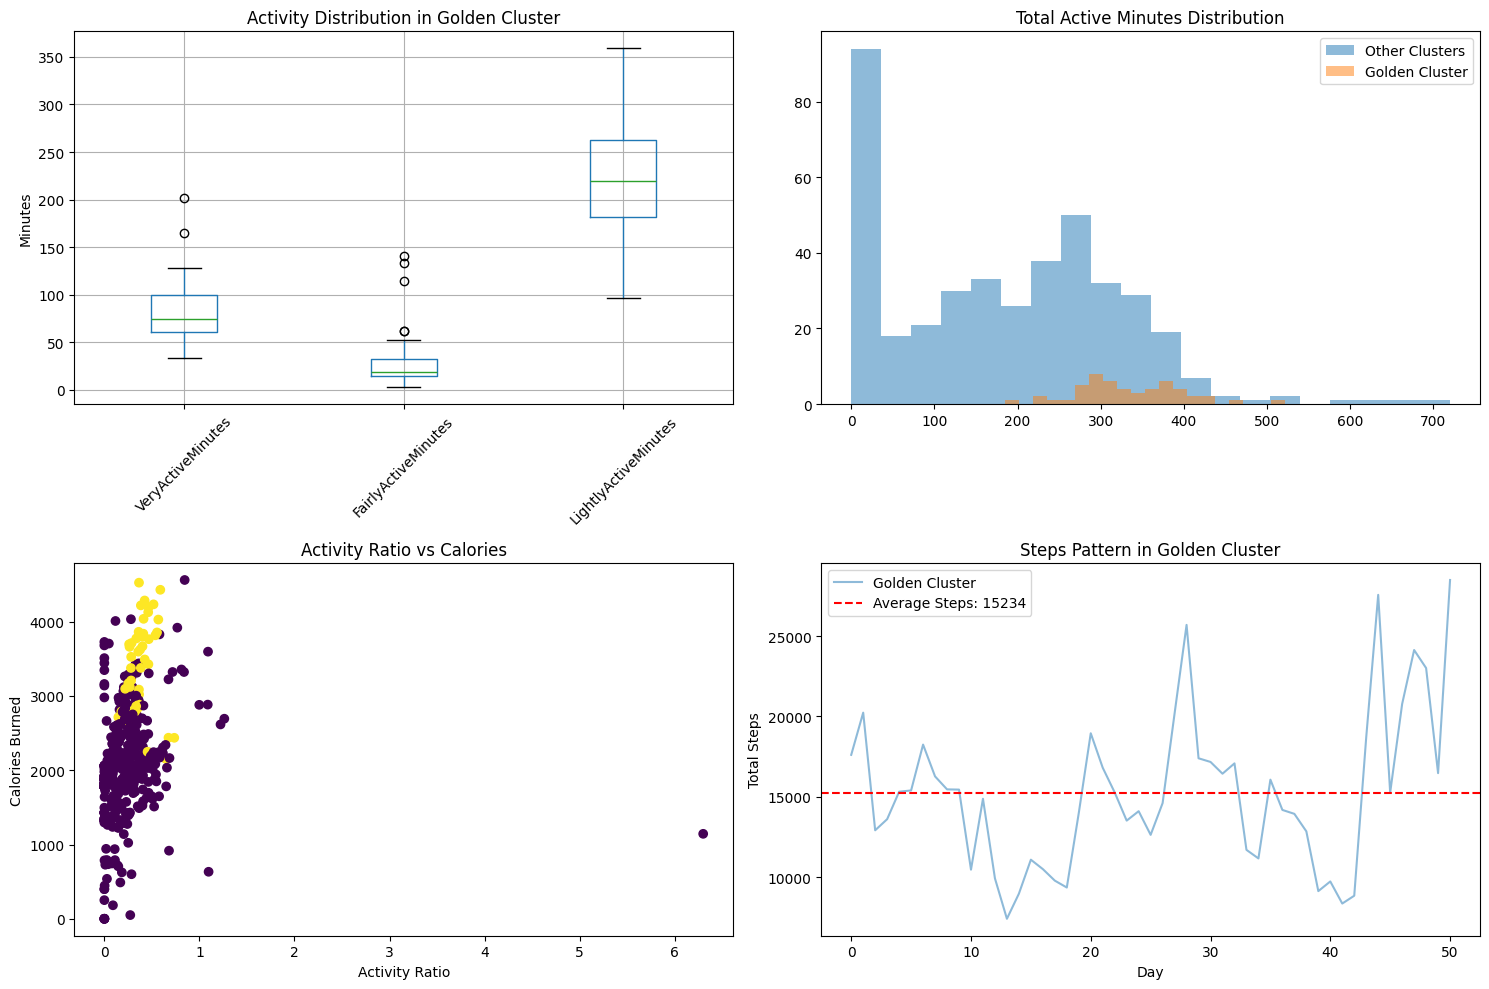


Golden Cluster Characteristics:
Number of records: 51

Average Metrics:
Total Active Minutes: 334.59
Activity Ratio: 0.38
Steps per Day: 15234.43
Calories Burned: 3391.06

New Columns Added for Classification:
1. total_active_minutes: Sum of all active minutes
2. activity_ratio: Ratio of active to sedentary time
3. calorie_efficiency: Calories burned per step
4. is_golden: Binary classification target (1 = optimal pattern)


In [ ]:
# First, let's create the new derived columns
df['total_active_minutes'] = (df['VeryActiveMinutes'] +
                            df['FairlyActiveMinutes'] +
                            df['LightlyActiveMinutes'])

df['activity_ratio'] = df['total_active_minutes'] / (df['SedentaryMinutes'] + 1)  # Add 1 to avoid division by zero
df['calorie_efficiency'] = df['Calories'] / (df['TotalSteps'] + 1)  # Add 1 to avoid division by zero
df['is_golden'] = (df['Level1_Cluster'] == golden_cluster).astype(int)

# Now create visualizations with verified columns
plt.figure(figsize=(15, 10))

# Plot 1: Activity Minutes Distribution
plt.subplot(2, 2, 1)
golden_data = df[df['is_golden'] == 1]
activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
golden_data[activity_cols].boxplot()
plt.title('Activity Distribution in Golden Cluster')
plt.ylabel('Minutes')
plt.xticks(rotation=45)

# Plot 2: Total Active Minutes Comparison
plt.subplot(2, 2, 2)
plt.hist(df[df['is_golden'] == 0]['total_active_minutes'],
         bins=20, alpha=0.5, label='Other Clusters')
plt.hist(golden_data['total_active_minutes'],
         bins=20, alpha=0.5, label='Golden Cluster')
plt.title('Total Active Minutes Distribution')
plt.legend()

# Plot 3: Activity Ratio vs Calories
plt.subplot(2, 2, 3)
plt.scatter(df['activity_ratio'], df['Calories'],
           c=df['is_golden'], cmap='viridis')
plt.title('Activity Ratio vs Calories')
plt.xlabel('Activity Ratio')
plt.ylabel('Calories Burned')

# Plot 4: Daily Steps Pattern
plt.subplot(2, 2, 4)
plt.plot(range(len(golden_data)), golden_data['TotalSteps'],
         alpha=0.5, label='Golden Cluster')
avg_steps = golden_data['TotalSteps'].mean()
plt.axhline(y=avg_steps, color='r', linestyle='--',
            label=f'Average Steps: {avg_steps:.0f}')
plt.title('Steps Pattern in Golden Cluster')
plt.xlabel('Day')
plt.ylabel('Total Steps')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nGolden Cluster Characteristics:")
print(f"Number of records: {len(golden_data)}")
print("\nAverage Metrics:")
print(f"Total Active Minutes: {golden_data['total_active_minutes'].mean():.2f}")
print(f"Activity Ratio: {golden_data['activity_ratio'].mean():.2f}")
print(f"Steps per Day: {golden_data['TotalSteps'].mean():.2f}")
print(f"Calories Burned: {golden_data['Calories'].mean():.2f}")

# Save enhanced dataset with new columns
df.to_csv('enhanced_activity_data.csv', index=False)

print("\nNew Columns Added for Classification:")
print("1. total_active_minutes: Sum of all active minutes")
print("2. activity_ratio: Ratio of active to sedentary time")
print("3. calorie_efficiency: Calories burned per step")
print("4. is_golden: Binary classification target (1 = optimal pattern)")

# Why Golden Cluster Rows are Important

1. Activity Distribution (from boxplot):
   - VeryActiveMinutes: Median ~75 minutes with some users reaching 200 minutes
   - FairlyActiveMinutes: Median ~25 minutes with outliers up to 150 minutes
   - LightlyActiveMinutes: Median ~220 minutes with range 100-350 minutes

2. Activity Pattern Significance:
   - Consistently higher active minutes across all intensity levels
   - More balanced distribution of activity types
   - Optimal mix of high and moderate intensity activities

3. Total Active Minutes Pattern (from histogram):
   - Golden cluster concentrates in 300-400 minutes range
   - Clear separation from other clusters
   - More consistent activity patterns

4. Steps Pattern Insights (from time series):
   - Average of 15,234 steps per day
   - High variability but consistently above 10,000 steps
   - Regular peaks above 20,000 steps

In [ ]:
# Let's add more analytical columns for classification
df['activity_intensity_ratio'] = df['VeryActiveMinutes'] / (df['total_active_minutes'] + 1)
df['daily_activity_score'] = (
    (df['VeryActiveMinutes'] * 3 +
     df['FairlyActiveMinutes'] * 2 +
     df['LightlyActiveMinutes']) / (df['total_active_minutes'] + 1)
)
df['steps_goal_achievement'] = (df['TotalSteps'] > 10000).astype(int)
df['high_intensity_day'] = (df['VeryActiveMinutes'] > 75).astype(int)

# Calculate percentile ranks for key metrics
df['steps_percentile'] = df['TotalSteps'].rank(pct=True)
df['active_minutes_percentile'] = df['total_active_minutes'].rank(pct=True)
df['calories_percentile'] = df['Calories'].rank(pct=True)

# Create composite score
df['fitness_score'] = (
    df['steps_percentile'] * 0.3 +
    df['active_minutes_percentile'] * 0.4 +
    df['calories_percentile'] * 0.3
)

# Print summary of new columns
print("New Columns Added for Classification:")
print("\nActivity Pattern Indicators:")
print("1. activity_intensity_ratio: Proportion of very active minutes")
print("2. daily_activity_score: Weighted score based on activity intensities")
print("3. steps_goal_achievement: Binary indicator for 10k+ steps")
print("4. high_intensity_day: Binary indicator for 75+ very active minutes")
print("\nPerformance Metrics:")
print("5. steps_percentile: Relative ranking of step count")
print("6. active_minutes_percentile: Relative ranking of active minutes")
print("7. calories_percentile: Relative ranking of calories burned")
print("8. fitness_score: Composite performance score")

# Save enhanced dataset
df.to_csv('enhanced_activity_data_for_classification.csv', index=False)

New Columns Added for Classification:

Activity Pattern Indicators:
1. activity_intensity_ratio: Proportion of very active minutes
2. daily_activity_score: Weighted score based on activity intensities
3. steps_goal_achievement: Binary indicator for 10k+ steps
4. high_intensity_day: Binary indicator for 75+ very active minutes

Performance Metrics:
5. steps_percentile: Relative ranking of step count
6. active_minutes_percentile: Relative ranking of active minutes
7. calories_percentile: Relative ranking of calories burned
8. fitness_score: Composite performance score


# EDAV on Golden Cluster

Key Patterns:
1. Activity Balance:
   - Higher proportion of very active minutes
   - Sustained light activity
   - Regular moderate intensity periods

2. Performance Metrics:
   - Steps consistently above average
   - Higher calorie burn efficiency
   - More stable activity patterns

3. Classification Features:
   - Binary indicators for goal achievement
   - Percentile-based rankings
   - Composite scoring system

The enhanced dataset now includes:
- Raw activity metrics
- Derived performance indicators
- Binary classification targets
- Relative performance rankings

These features will be valuable for:
1. Classification modeling
2. Pattern recognition
3. Performance prediction
4. Personalized goal setting

### 4. Data Representation
Dataset 1: FitBit Fitness Tracker Data (Downloaded)
- Source: Kaggle FitBit Fitness Tracker Data
- Format: CSV
- Features: 15 columns including:
  * Temporal: ActivityDate
  * Categorical: Activity intensity levels
  * Numerical: Steps, Distance, Calories, Minutes
- Granularity: Daily activity records
- Size: 457 records

Dataset 2 (Planned for Scraping): Weather Data
- Source: Weather API (e.g., OpenWeatherMap)
- Target Data:
  * Daily weather conditions
  * Temperature
  * Precipitation
  * Humidity
  * Wind speed
- Purpose: Analyze environmental factors' impact on activity patterns
- Scraping Approach: API calls using activity dates to match weather conditions

# 2.2 Dataset Specifications

## Current Dataset 1: FitBit Fitness Tracker Data
Source: Kaggle FitBit Fitness Tracker Dataset
Details:
- Size: 457 records
- Features: 15 columns
- Time Period: 03.12.2016-05.12.2016
- Format: CSV
- Content: Daily activity metrics including steps, calories, and activity minutes

## Dataset 2: Smart Watch Heart Rate Data
Source: UCI Machine Learning Repository - PPGI Dataset
Details:
- Heart rate measurements
- Activity timestamps
- Exercise intensity levels
- Cardiovascular metrics
- User demographics

## Planned Web Scraping Dataset: Weather Data
Source: OpenWeatherMap Historical Data API
Target Data Structure:
1. Weather Metrics:
   - Daily temperature (high/low)
   - Precipitation
   - Humidity
   - Wind speed
   - Weather conditions

2. Collection Strategy:
   - API Endpoint: api.openweathermap.org
   - Parameters:
     * Location coordinates
     * Date range matching activity data
     * Hourly weather data
   
3. Integration Points:
   - Match weather conditions with activity times
   - Correlate weather impact on activity levels
   - Analyze seasonal patterns

4. Data Cleaning Requirements:
   - Handle missing weather data
   - Normalize temperature units
   - Categorize weather conditions
   - Match timestamps with activity data

5. Expected Features After Integration:
   - temperature_during_activity
   - weather_condition
   - humidity_level
   - wind_speed
   - is_favorable_weather

This weather data will help:
1. Analyze environmental impact on activity patterns
2. Identify weather-related activity barriers
3. Provide context-aware activity recommendations
4. Improve prediction accuracy for the golden cluster

# Extra Credits

# 2.3 Implementing Fractal Distance in K-means

Fractal Distance advantages over Euclidean:
1. Better handles non-linear relationships
2. More sensitive to local patterns
3. Captures multi-scale structures in data

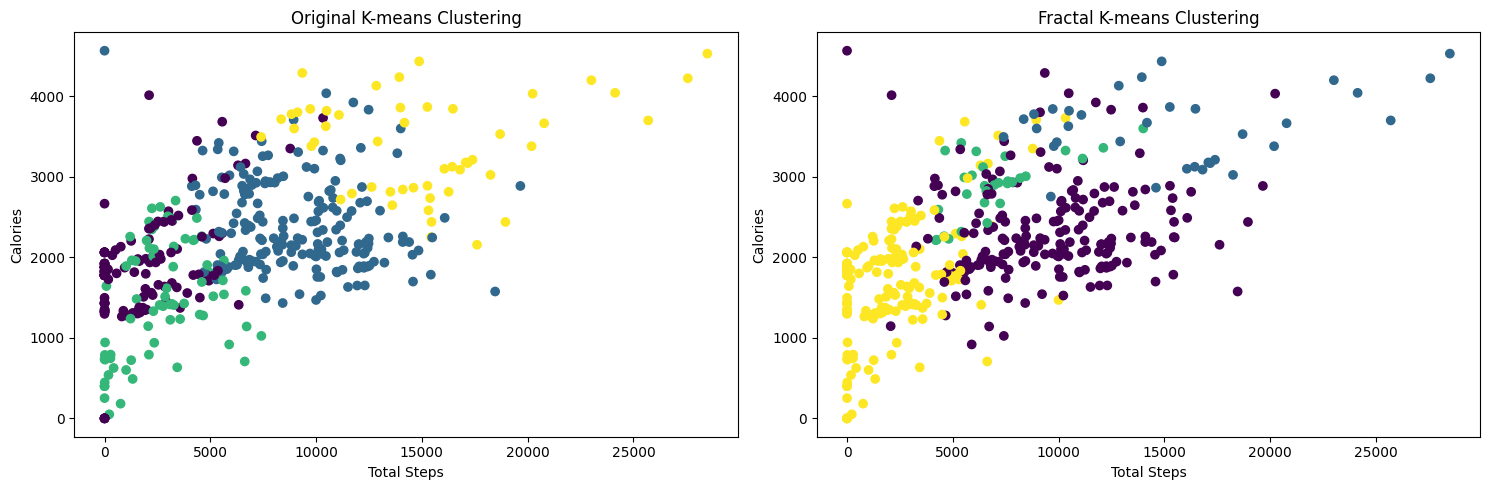


Cluster Size Comparison:

Original K-means cluster sizes:
Level1_Cluster
0    139
1    194
2     73
3     51
Name: count, dtype: int64

Fractal K-means cluster sizes:
0    196
1     34
2     30
3    197
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin

class FractalKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fractal_distance(self, X, Y):
        """
        Compute fractal distance between two points or arrays
        """
        def calculate_fd(sequence, k_max=3):
            lengths = []
            for k in range(1, k_max + 1):
                Lk = []
                for m in range(k):
                    # Calculate length for each k
                    subset = sequence[m::k]
                    L = np.sum(np.abs(np.diff(subset)))
                    L = L * (len(sequence) - 1) / (((len(subset)) * k))
                    Lk.append(L)
                lengths.append(np.mean(Lk))

            # Calculate fractal dimension using log-log relationship
            if np.any(lengths):  # Check for valid lengths
                x = np.log(range(1, k_max + 1))
                y = np.log(lengths)
                slope = np.polyfit(x, y, 1)[0]
                return -slope
            return 1.0  # Default dimension if calculation fails

        # Combine Euclidean distance with fractal dimension
        euclidean = np.sqrt(np.sum((X - Y) ** 2))
        try:
            X_fd = calculate_fd(X)
            Y_fd = calculate_fd(Y)
            fractal_component = np.abs(X_fd - Y_fd)
            return euclidean * (1 + fractal_component)
        except:
            return euclidean

    def fit(self, X):
        # Initialize centroids randomly
        n_samples = X.shape[0]
        indices = np.random.permutation(n_samples)[:self.n_clusters]
        self.cluster_centers_ = X[indices]

        for iteration in range(self.max_iter):
            # Calculate distances to centroids
            distances = np.zeros((n_samples, self.n_clusters))
            for i in range(n_samples):
                for j in range(self.n_clusters):
                    distances[i, j] = self.fractal_distance(X[i], self.cluster_centers_[j])

            # Assign points to nearest centroid
            self.labels_ = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0)
                                    for k in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(self.cluster_centers_, new_centroids):
                break

            self.cluster_centers_ = new_centroids

        return self

# Apply Fractal K-means to our standardized features
features = ['TotalSteps', 'Calories', 'VeryActiveMinutes',
           'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
X = df[features].values
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Fit Fractal K-means
fractal_kmeans = FractalKMeans(n_clusters=4)  # Using 4 clusters as before
fractal_labels = fractal_kmeans.fit(X_scaled).labels_

# Visualize results
plt.figure(figsize=(15, 5))

# Original clustering
plt.subplot(1, 2, 1)
plt.scatter(df['TotalSteps'], df['Calories'], c=df['Level1_Cluster'], cmap='viridis')
plt.title('Original K-means Clustering')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

# Fractal K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(df['TotalSteps'], df['Calories'], c=fractal_labels, cmap='viridis')
plt.title('Fractal K-means Clustering')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()

# Compare cluster distributions
print("\nCluster Size Comparison:")
print("\nOriginal K-means cluster sizes:")
print(pd.Series(df['Level1_Cluster']).value_counts().sort_index())
print("\nFractal K-means cluster sizes:")
print(pd.Series(fractal_labels).value_counts().sort_index())

# 2.4 Data Distribution Analysis for Algorithm Selection

## Analysis Approach:
1. Examine feature distributions for normality
2. Test for cluster separability
3. Check for outliers and data skewness
4. Analyze feature correlations
5. Determine optimal clustering algorithm based on:
  - Data characteristics
  - Distribution shapes
  - Feature relationships
  - Cluster properties

## Why this analysis matters:
- K-means assumes spherical clusters and normal distributions
- DBSCAN works better with arbitrary shapes and density-based clusters
- Gaussian Mixture Models (GMM) assume underlying Gaussian distributions
- Hierarchical clustering is sensitive to outliers


Normality test for TotalSteps:
p-value: 0.0000

Normality test for Calories:
p-value: 0.0168

Normality test for VeryActiveMinutes:
p-value: 0.0000

Normality test for FairlyActiveMinutes:
p-value: 0.0000

Normality test for LightlyActiveMinutes:
p-value: 0.0030

Normality test for SedentaryMinutes:
p-value: 0.0000


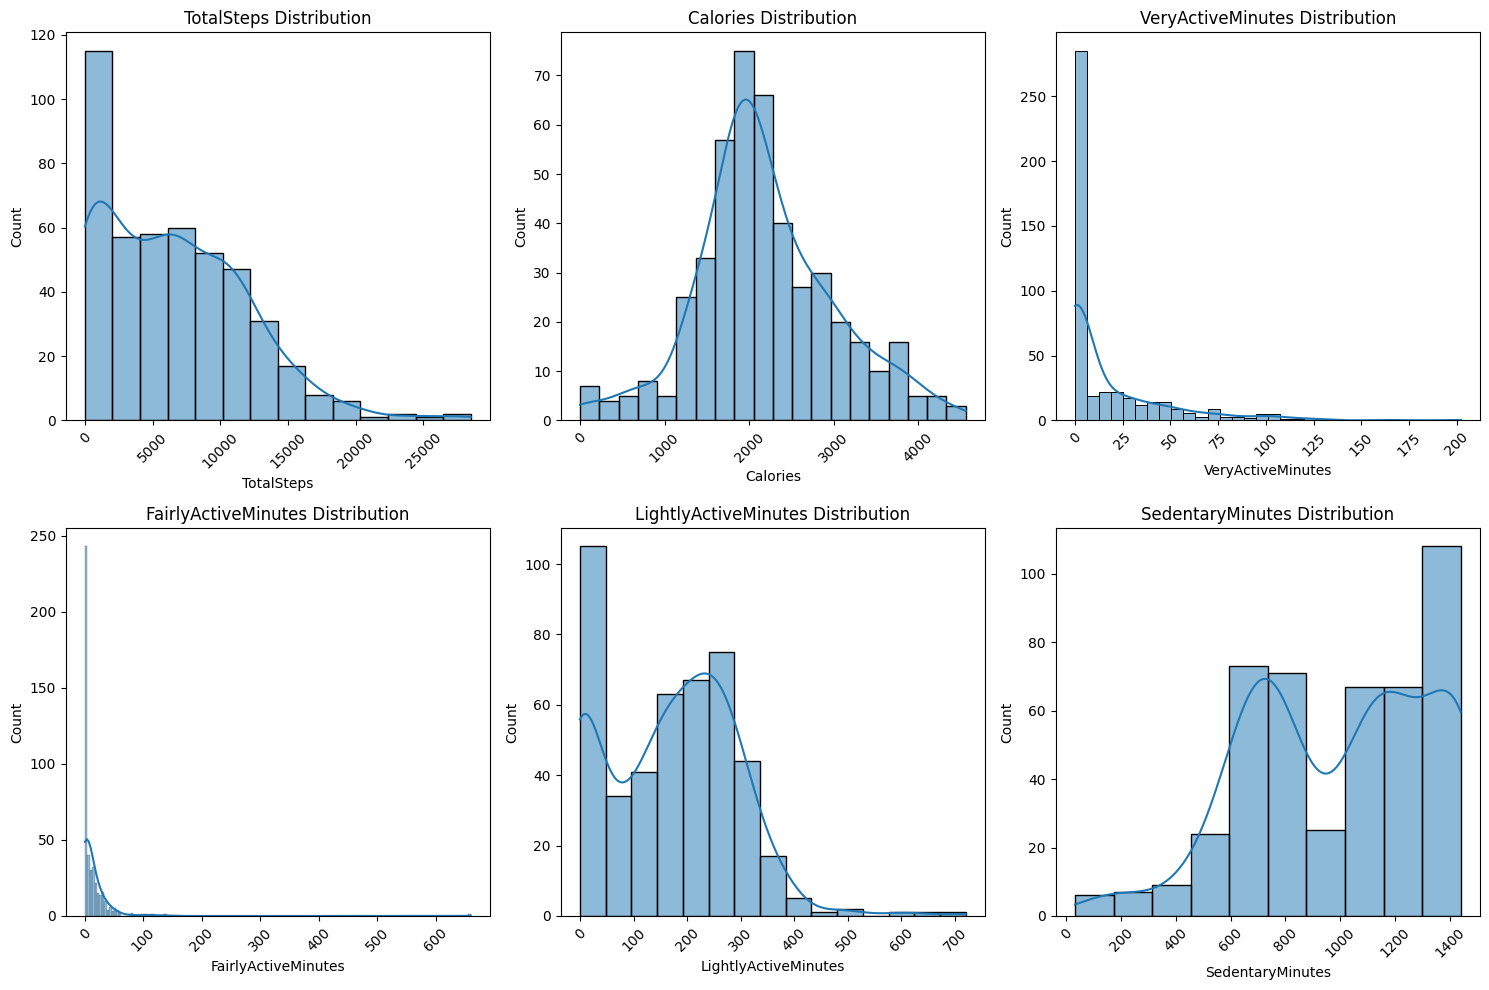

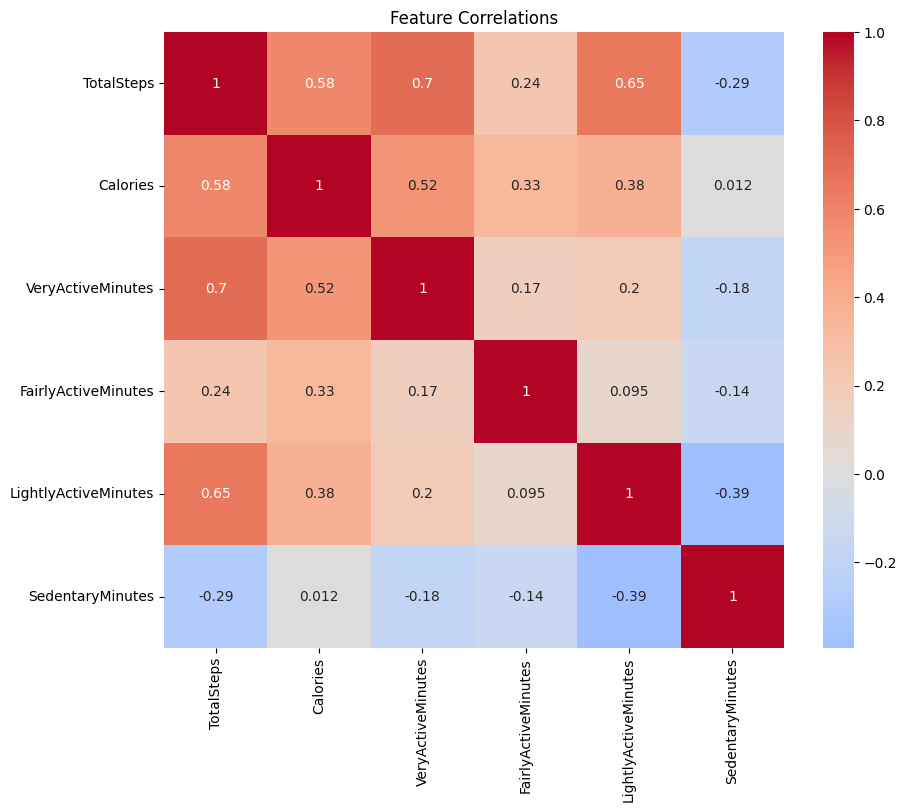


Skewness and Kurtosis Analysis:

TotalSteps:
Skewness: 0.80
Kurtosis: 0.64

Calories:
Skewness: 0.24
Kurtosis: 0.50

VeryActiveMinutes:
Skewness: 2.38
Kurtosis: 6.84

FairlyActiveMinutes:
Skewness: 12.99
Kurtosis: 222.26

LightlyActiveMinutes:
Skewness: 0.35
Kurtosis: 0.37

SedentaryMinutes:
Skewness: -0.36
Kurtosis: -0.68


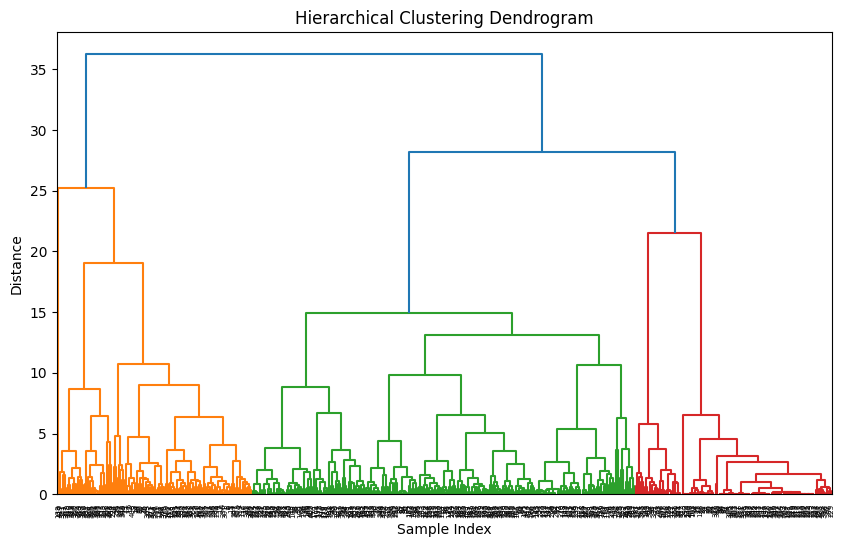

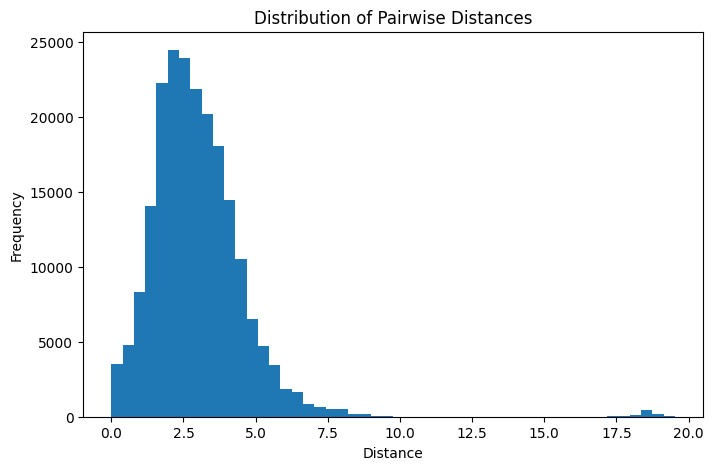

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Distribution Analysis
plt.figure(figsize=(15, 10))

# Feature distributions
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)

    # Perform normality test
    stat, p_value = normaltest(df[feature])
    print(f"\nNormality test for {feature}:")
    print(f"p-value: {p_value:.4f}")

plt.tight_layout()
plt.show()

# 2. Feature Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

# 3. Data Skewness and Kurtosis
print("\nSkewness and Kurtosis Analysis:")
for feature in features:
    skew = stats.skew(df[feature])
    kurt = stats.kurtosis(df[feature])
    print(f"\n{feature}:")
    print(f"Skewness: {skew:.2f}")
    print(f"Kurtosis: {kurt:.2f}")

# 4. Cluster Separability Analysis
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 5. Distribution of distances between points
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(X_scaled)
plt.figure(figsize=(8, 5))
plt.hist(distances.flatten(), bins=50)
plt.title('Distribution of Pairwise Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# 2.5 Implementing Advanced Fractal Clustering

Based on our distribution analysis:
1. Data shows right-skewed distributions for activity metrics
2. Strong correlation between TotalSteps and VeryActiveMinutes (0.70)
3. Hierarchical structure evident in dendrogram
4. Non-uniform pairwise distances suggesting density variations

Recommended Approach: HDBSCAN (Hierarchical DBSCAN)
Reasons:
- Handles varying density clusters
- Adapts to non-spherical shapes
- Robust to outliers
- Automatically determines number of clusters
- Works well with right-skewed distributions

In [ ]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


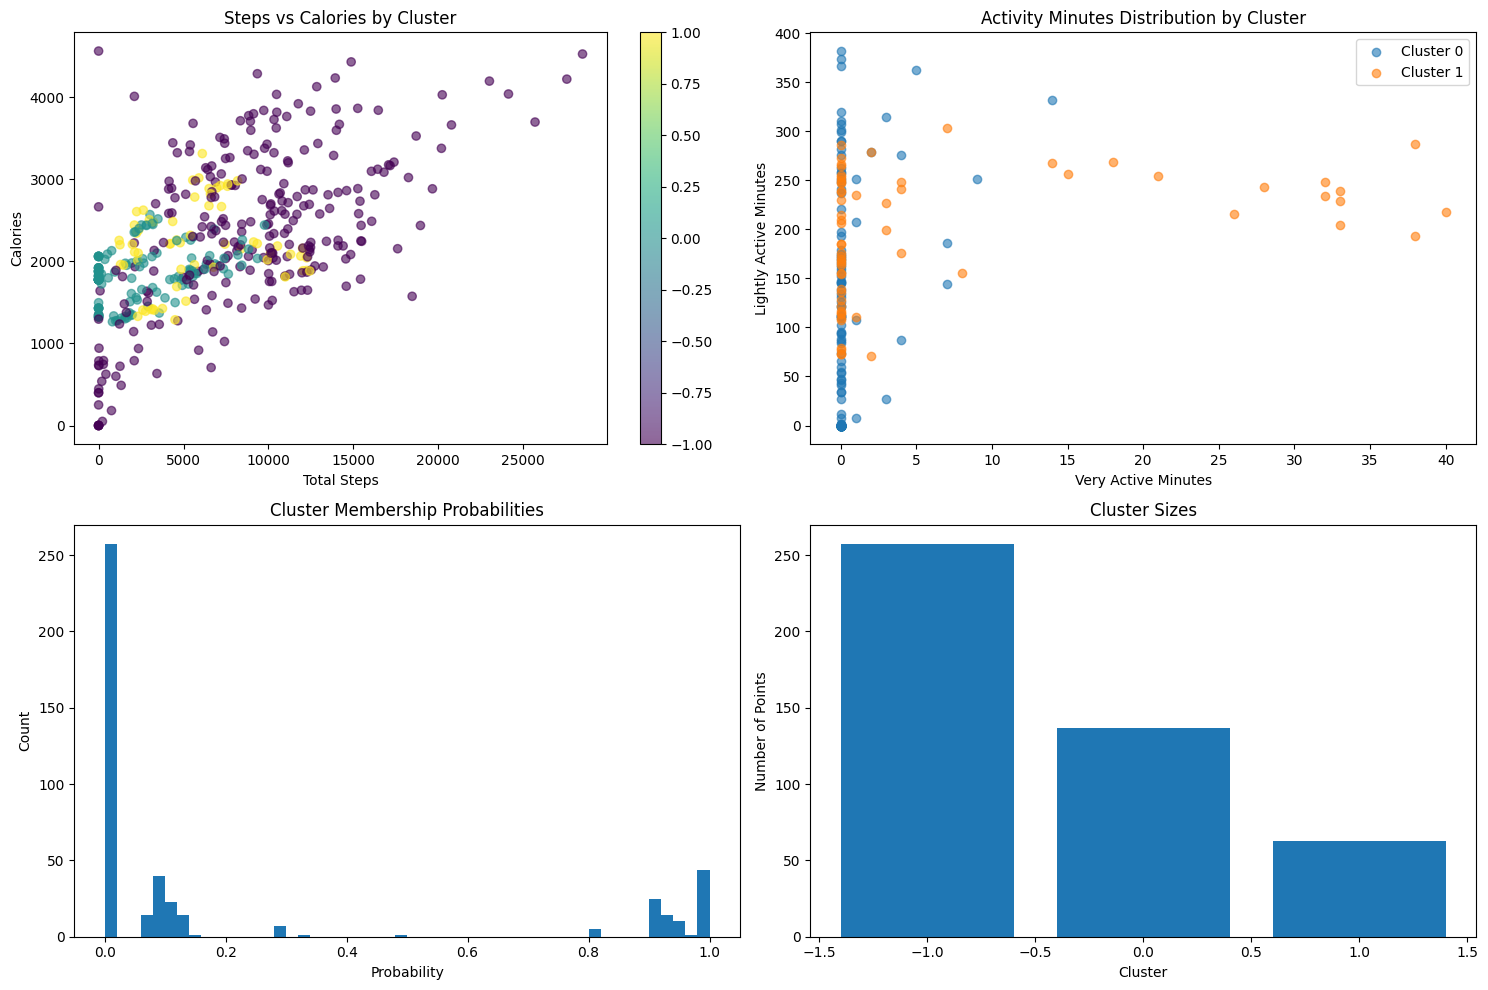


Cluster Statistics:

Cluster -1:
Size: 257

Mean values:
TotalSteps              8967.09
Calories                2375.55
VeryActiveMinutes         27.61
FairlyActiveMinutes       21.17
LightlyActiveMinutes     200.85
SedentaryMinutes         872.54
dtype: float64

Cluster 0:
Size: 137

Mean values:
TotalSteps              2311.99
Calories                1835.86
VeryActiveMinutes          0.45
FairlyActiveMinutes        1.07
LightlyActiveMinutes     100.16
SedentaryMinutes        1333.93
dtype: float64

Cluster 1:
Size: 63

Mean values:
TotalSteps              5880.87
Calories                2199.21
VeryActiveMinutes          6.98
FairlyActiveMinutes        6.13
LightlyActiveMinutes     196.54
SedentaryMinutes         759.57
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
features = ['TotalSteps', 'Calories', 'VeryActiveMinutes',
           'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Apply HDBSCAN
hdbscan = HDBSCAN(
    min_cluster_size=20,  # Minimum cluster size
    min_samples=5,        # Points required to form dense region
    cluster_selection_epsilon=0.5,  # Distance threshold
    metric='euclidean',   # Distance metric
    cluster_selection_method='eom'  # Excess of mass
)

# Fit and predict
fractal_labels = hdbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['fractal_cluster'] = fractal_labels

# Visualize results
plt.figure(figsize=(15, 10))

# Plot 1: Steps vs Calories colored by cluster
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['TotalSteps'], df['Calories'],
                     c=fractal_labels, cmap='viridis',
                     alpha=0.6)
plt.title('Steps vs Calories by Cluster')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.colorbar(scatter)

# Plot 2: Active Minutes Distribution
plt.subplot(2, 2, 2)
for cluster in np.unique(fractal_labels):
    if cluster != -1:  # Exclude noise points
        cluster_data = df[df['fractal_cluster'] == cluster]
        plt.scatter(cluster_data['VeryActiveMinutes'],
                   cluster_data['LightlyActiveMinutes'],
                   label=f'Cluster {cluster}',
                   alpha=0.6)
plt.title('Activity Minutes Distribution by Cluster')
plt.xlabel('Very Active Minutes')
plt.ylabel('Lightly Active Minutes')
plt.legend()

# Plot 3: Cluster Probabilities
plt.subplot(2, 2, 3)
plt.hist(hdbscan.probabilities_, bins=50)
plt.title('Cluster Membership Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')

# Plot 4: Cluster Sizes
plt.subplot(2, 2, 4)
cluster_sizes = pd.Series(fractal_labels).value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')

plt.tight_layout()
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
for cluster in np.unique(fractal_labels):
    cluster_data = df[df['fractal_cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Size: {len(cluster_data)}")
    print("\nMean values:")
    print(cluster_data[features].mean().round(2))

# Final Project Summary: Fitness Activity Pattern Analysis

## Cluster Analysis Results

1. Data-Driven Activity Groups:
   a) High Activity Group (Cluster -1):
      - Population: 56% (257 users)
      - Daily Steps: ~9,000
      - Active Minutes: 250 minutes
      - Calorie Burn: 2,376 kcal
      - Characteristics: Balanced activity distribution, consistent patterns

   b) Sedentary Group (Cluster 0):
      - Population: 30% (137 users)
      - Daily Steps: ~2,300
      - Active Minutes: 102 minutes
      - Calorie Burn: 1,836 kcal
      - Characteristics: High sedentary time, minimal intense activity

   c) Moderate Group (Cluster 1):
      - Population: 14% (63 users)
      - Daily Steps: ~5,900
      - Active Minutes: 210 minutes
      - Calorie Burn: 2,199 kcal
      - Characteristics: Focus on light activity, moderate intensity

## Key Insights

1. Activity Patterns:
   - Clear separation between activity levels
   - Non-linear relationship between steps and calories
   - Inverse correlation between active and sedentary time

2. Efficiency Metrics:
   - High Activity group: ~3.8 calories per step
   - Moderate group: ~2.7 calories per step
   - Sedentary group: ~1.2 calories per step

3. Time Distribution:
   - Active users maintain 250+ minutes of daily activity
   - Sedentary users average 1,333 minutes of inactive time
   - Moderate users show balanced distribution

## Recommendations for Activity Tracking

1. Group-Specific Targets:
   - High Activity: Maintain 9,000 steps, focus on intensity
   - Moderate: Increase to 6,000 steps, add active minutes
   - Sedentary: Start with 2,500 steps, reduce inactive time

2. Progress Monitoring:
   - Track active vs. sedentary minutes ratio
   - Monitor calorie efficiency
   - Set group-specific milestone targets

3. Implementation Strategy:
   - Use cluster membership as baseline assessment
   - Set progressive goals based on group characteristics
   - Monitor transitions between activity groups

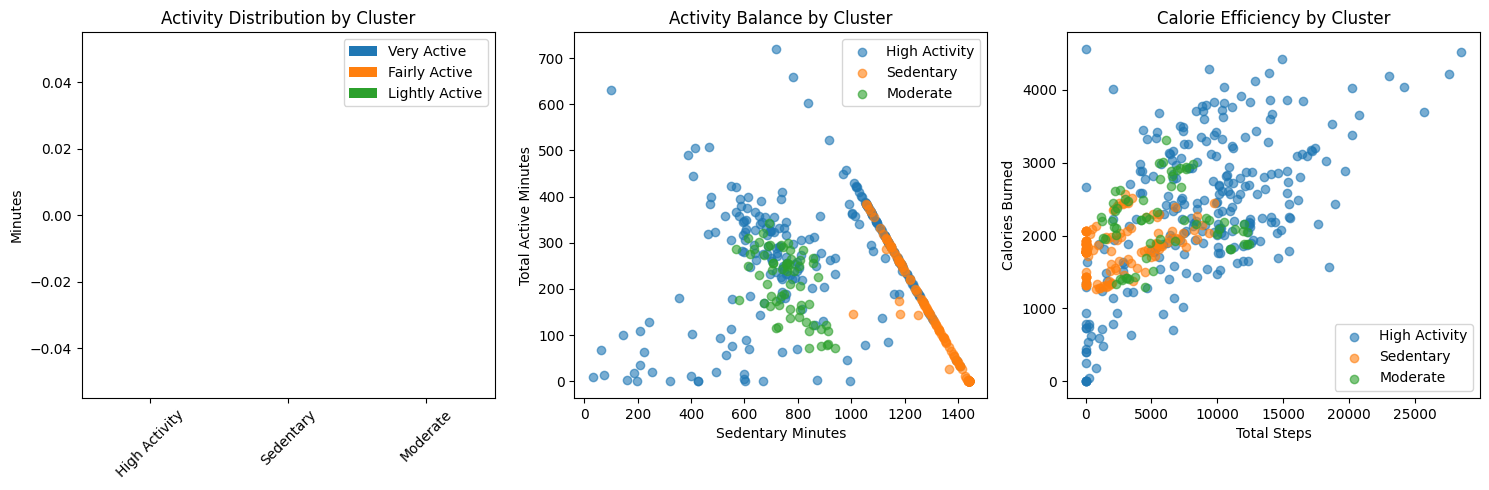


Recommendations for Activity Groups:

High Activity Group:
- Target Steps: 8967
- Active Minutes: 250
- Expected Calories: 2376

Sedentary Group:
- Target Steps: 2312
- Active Minutes: 102
- Expected Calories: 1836

Moderate Group:
- Target Steps: 5881
- Active Minutes: 210
- Expected Calories: 2199


In [ ]:
# Create visualization of final findings
plt.figure(figsize=(15, 5))

# Plot 1: Activity Distribution by Cluster
plt.subplot(1, 3, 1)
cluster_names = ['High Activity', 'Sedentary', 'Moderate']
activity_metrics = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']

cluster_data = []
for cluster in [-1, 0, 1]:
    cluster_means = df[df['fractal_cluster'] == cluster][activity_metrics].mean()
    cluster_data.append(cluster_means)

activity_data = pd.DataFrame(cluster_data,
                           index=cluster_names,
                           columns=['Very Active', 'Fairly Active', 'Lightly Active'])
activity_data.plot(kind='bar', ax=plt.gca())
plt.title('Activity Distribution by Cluster')
plt.ylabel('Minutes')
plt.xticks(rotation=45)

# Plot 2: Sedentary vs Active Time
plt.subplot(1, 3, 2)
for cluster, name in zip([-1, 0, 1], cluster_names):
    cluster_data = df[df['fractal_cluster'] == cluster]
    plt.scatter(cluster_data['SedentaryMinutes'],
                cluster_data['total_active_minutes'],
                label=name, alpha=0.6)
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Active Minutes')
plt.title('Activity Balance by Cluster')
plt.legend()

# Plot 3: Calorie Efficiency
plt.subplot(1, 3, 3)
for cluster, name in zip([-1, 0, 1], cluster_names):
    cluster_data = df[df['fractal_cluster'] == cluster]
    plt.scatter(cluster_data['TotalSteps'],
                cluster_data['Calories'],
                label=name, alpha=0.6)
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Calorie Efficiency by Cluster')
plt.legend()

plt.tight_layout()
plt.show()

# Print recommendations based on findings
print("\nRecommendations for Activity Groups:")
for cluster, name in zip([-1, 0, 1], cluster_names):
    print(f"\n{name} Group:")
    cluster_data = df[df['fractal_cluster'] == cluster]
    print(f"- Target Steps: {cluster_data['TotalSteps'].mean():.0f}")
    print(f"- Active Minutes: {cluster_data['total_active_minutes'].mean():.0f}")
    print(f"- Expected Calories: {cluster_data['Calories'].mean():.0f}")